<a href="https://colab.research.google.com/github/nuibb/Tensorflow-Examples/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf 
import numpy as np 
import math
import matplotlib.pyplot as plt 
import matplotlib.animation as anim 

Generate some house sizes between 1000 and 3500 square feet

In [53]:
num_house = 10
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house)
print(house_size)

[1860 2294 2130 2095 2638 3169 1466 2238 1330 2482]


Generate house prices from house size with a random noise added.

In [54]:
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house)
print(house_price)

[221795. 250260. 271158. 274232. 295084. 343165. 183450. 280994. 174962.
 315391.]


Showing with graph

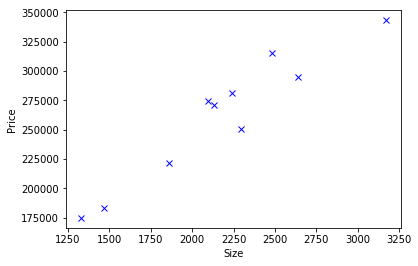

In [55]:
plt.plot(house_size, house_price, "bx") # bx for blue x
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

Now you need to normalize values to prevent under/overflow, house price and size should be on same scale

In [0]:
def normalize(array):
  return (array - array.mean())/array.std()

Define number of training samples, 0.7 = 70%. We can take the first 70% since the values are randomized

In [57]:
num_train_samples = math.floor(num_house * 0.7)
print(num_train_samples)

7


Define training data

In [0]:
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asarray(house_price[:num_train_samples])

Normalizing data

In [0]:
train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

Set up the Tensorflow placeholders that get updated as we descent down the gradient

In [0]:
tf_house_size = tf.placeholder("float", name="house_size")
tf_price = tf.placeholder("float", name="price")

Define the variables holding the size_factor and price we set during training. We initialize them to some random values based on the normal distribution.

In [0]:
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")

Now define the operations for predicting values (Inference function) - predicted price = (size_factor * house_size) + price_offset.

In [0]:
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)

Define the cost function ( how much error ) - Mean squared error

In [0]:
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price, 2))/(2*num_train_samples)

Optimizer learning rate. The size of the steps down on the gradient

In [0]:
learning_rate = 0.1

Define a gradient descent optimizer that will minimize the loss defined in the operation "cost"

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

Initializing the graph in the sesion

In [0]:
init = tf.global_variables_initializer()

Launch the graph in the session

In [67]:
with tf.Session() as sess:
  sess.run(init)
  #Set how often to display progress and number of training iterations
  display_every = 2
  num_training_iter = 50
  #Keep iterating the training data
  for iteration in range(num_training_iter):
    #fit all training data
    for (x, y) in zip(train_house_size_norm, train_price_norm):
      sess.run(optimizer, feed_dict={tf_house_size:x, tf_price:y})
      
    #Display current status
    if (iteration + 1) % display_every == 0:
      c = sess.run(tf_cost, feed_dict={tf_house_size:train_house_size_norm, tf_price:train_price_norm})
      print("Iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c),  "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
      
  print("Optimization finished!")  
  training_cost = sess.run(tf_cost, feed_dict={tf_house_size:train_house_size_norm, tf_price:train_price_norm})
  print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')

Iteration #: 0002 cost= 1.222628951 size_factor= -0.5440241 price_offset= -0.33222318
Iteration #: 0004 cost= 0.825227320 size_factor= -0.26601377 price_offset= -0.26773965
Iteration #: 0006 cost= 0.561765611 size_factor= -0.03949545 price_offset= -0.21574716
Iteration #: 0008 cost= 0.387113392 size_factor= 0.14506733 price_offset= -0.17383155
Iteration #: 0010 cost= 0.271344334 size_factor= 0.29544502 price_offset= -0.14004435
Iteration #: 0012 cost= 0.194614619 size_factor= 0.417969 price_offset= -0.112812996
Iteration #: 0014 cost= 0.143766344 size_factor= 0.517798 price_offset= -0.0908685
Iteration #: 0016 cost= 0.110075086 size_factor= 0.5991356 price_offset= -0.07318701
Iteration #: 0018 cost= 0.087756328 size_factor= 0.6654067 price_offset= -0.05894247
Iteration #: 0020 cost= 0.072975062 size_factor= 0.71940184 price_offset= -0.04746854
Iteration #: 0022 cost= 0.063188717 size_factor= 0.76339483 price_offset= -0.03822775
Iteration #: 0024 cost= 0.056711890 size_factor= 0.7992384